## Implementation of EDA 

### Step 1: Understanding the Problem and the Data

### Step 2: Importing and Inspecting the Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset form seaborn
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


### Step 3: Handling Missing Data

In [3]:
# Check Missing Values
missing = titanic.isnull().sum()
print("Missing values per column: \n", missing)

Missing values per column: 
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [4]:
# Drop columns with too many missing values or fill them
titanic.drop(columns=["deck"], inplace=True)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [5]:
# age column
titanic["age"] = titanic["age"].fillna(titanic["age"].median())
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [6]:
# embarked
titanic["embarked"] = titanic["embarked"].fillna(titanic["embarked"].mode()[0])
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [7]:
# embark_town
titanic.dropna(subset=["embark_town"], inplace=True)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [8]:
# Check Missing Values
missing = titanic.isnull().sum()
print("Missing values per column: \n", missing)

Missing values per column: 
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


## Step 4: Exploring Data Characteristics

In [9]:
# Summary Statistics
print(titanic.describe()) # numerical

         survived      pclass         age       sibsp       parch        fare
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000
mean     0.382452    2.311586   29.315152    0.524184    0.382452   32.096681
std      0.486260    0.834700   12.984932    1.103705    0.806761   49.697504
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [10]:
print(titanic.describe(include="object")) # categorical

         sex embarked  who  embark_town alive
count    889      889  889          889   889
unique     2        3    3            3     2
top     male        S  man  Southampton    no
freq     577      644  537          644   549


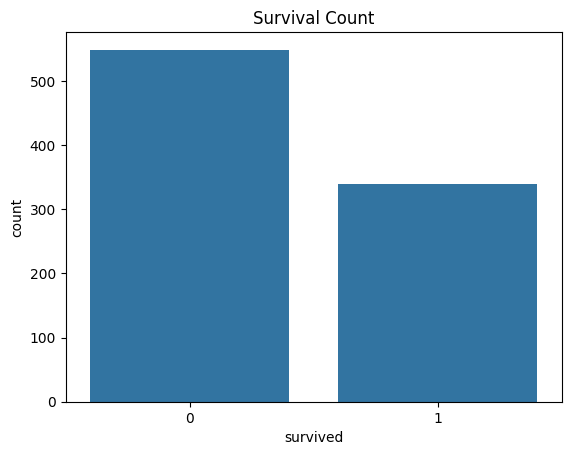

In [11]:
# Distribution of target variable
sns.countplot(x="survived", data=titanic)
plt.title("Survival Count")
plt.show()

In [12]:
# check unique values
print(titanic.nunique())

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           247
embarked         3
class            3
who              3
adult_male       2
embark_town      3
alive            2
alone            2
dtype: int64


## Step 5: Performing Data Transformation

In [13]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical features
le = LabelEncoder()
titanic['sex'] = le.fit_transform(titanic['sex']) # male=1 , female=0
titanic['embarked'] = le.fit_transform(titanic['embarked']) # S=0, C=1, Q=2
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,Second,man,True,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,2,First,woman,False,Southampton,yes,True
888,0,3,0,28.0,1,2,23.4500,2,Third,woman,False,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,0,First,man,True,Cherbourg,yes,True


In [14]:
# bin age
titanic['age_bin'] = pd.cut(titanic['age'], bins=[0, 12, 20, 40, 60, 100], labels=["child", "teen", "adult","middle","senior"])
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_bin
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,Southampton,no,False,adult
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,Cherbourg,yes,False,adult
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,Southampton,yes,True,adult
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,Southampton,yes,False,adult
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,Southampton,no,True,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,Second,man,True,Southampton,no,True,adult
887,1,1,0,19.0,0,0,30.0000,2,First,woman,False,Southampton,yes,True,teen
888,0,3,0,28.0,1,2,23.4500,2,Third,woman,False,Southampton,no,False,adult
889,1,1,1,26.0,0,0,30.0000,0,First,man,True,Cherbourg,yes,True,adult


In [15]:
# one-hot encoding for age_bin
titanic = pd.get_dummies(titanic, columns=["age_bin"], drop_first=True)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_bin_teen,age_bin_adult,age_bin_middle,age_bin_senior
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,Southampton,no,False,False,True,False,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,Cherbourg,yes,False,False,True,False,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,Southampton,yes,True,False,True,False,False
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,Southampton,yes,False,False,True,False,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,Southampton,no,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,Second,man,True,Southampton,no,True,False,True,False,False
887,1,1,0,19.0,0,0,30.0000,2,First,woman,False,Southampton,yes,True,True,False,False,False
888,0,3,0,28.0,1,2,23.4500,2,Third,woman,False,Southampton,no,False,False,True,False,False
889,1,1,1,26.0,0,0,30.0000,0,First,man,True,Cherbourg,yes,True,False,True,False,False


## Step 6: Visualizing Relationship of Data

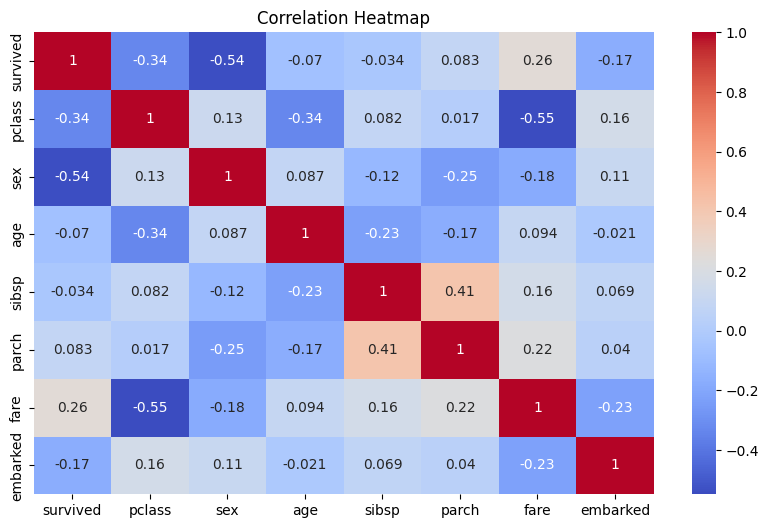

In [16]:
# correlation heatmap
plt.figure(figsize=(10,6))
numeric_cols = titanic.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

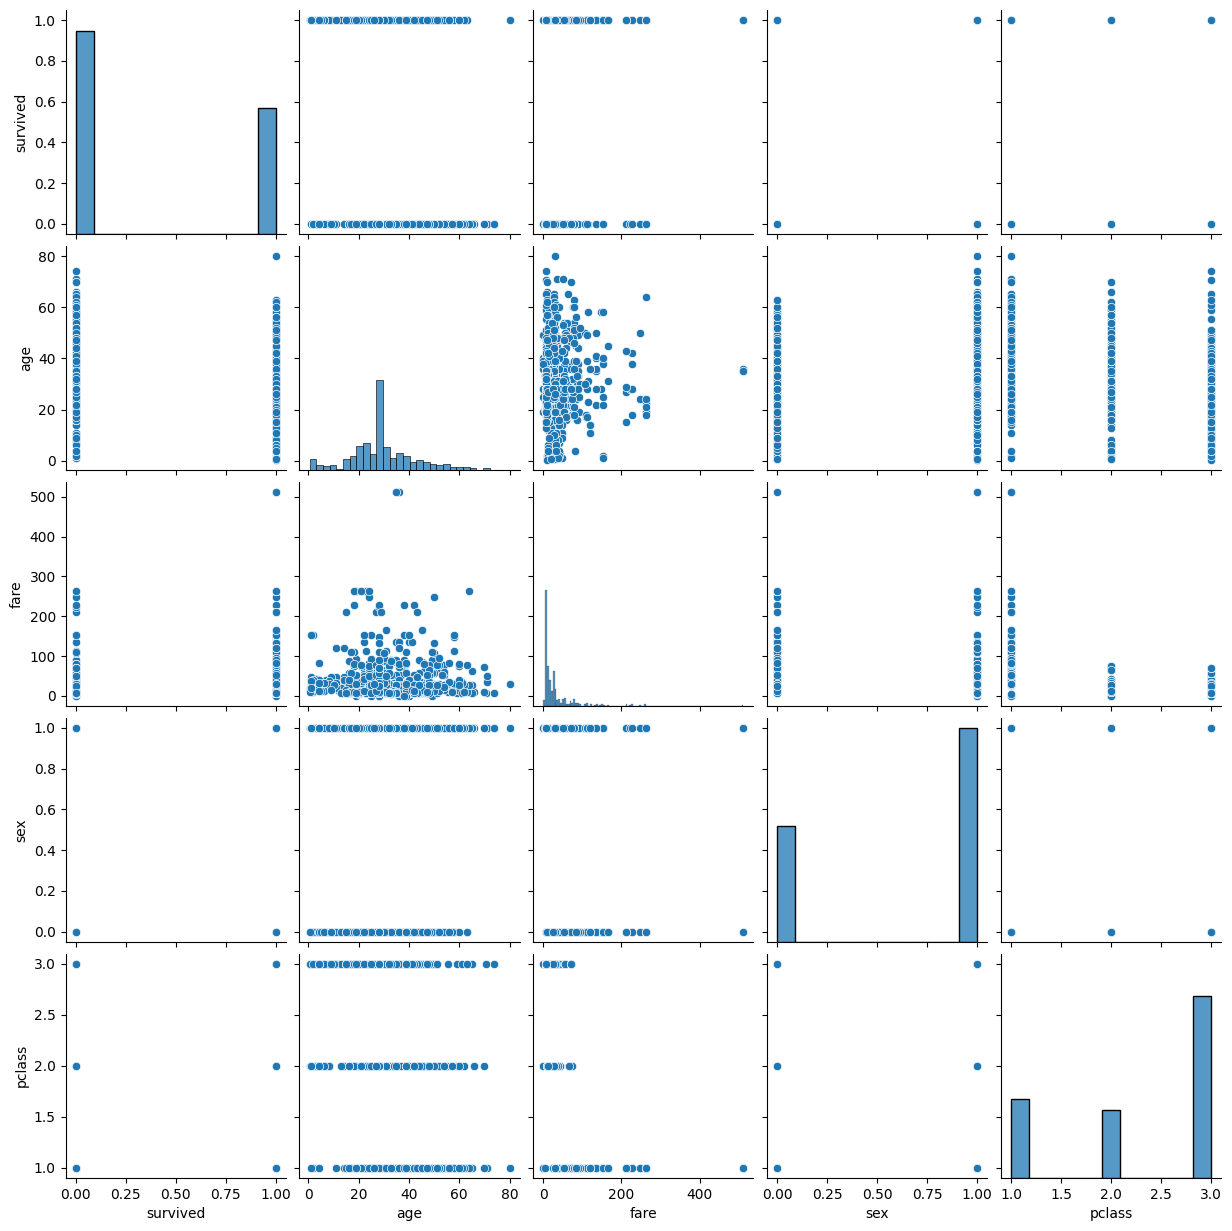

In [17]:
# Pairplot on selected feature
sns.pairplot(titanic[['survived','age','fare','sex','pclass']])
plt.show()

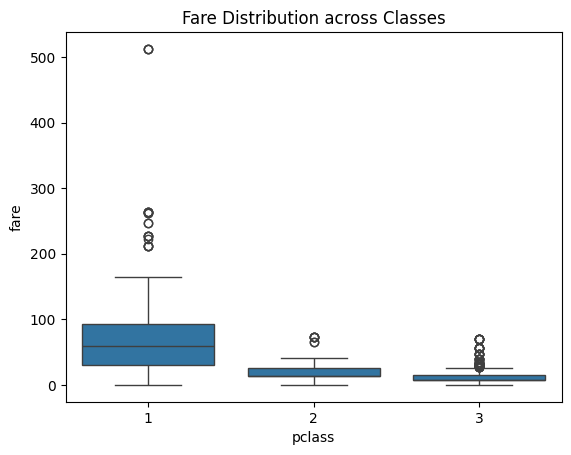

In [18]:
# Boxplot: Fare vs Pclass
sns.boxplot(x='pclass', y='fare', data=titanic)
plt.title("Fare Distribution across Classes")
plt.show()

## Step 7: Handling Outliers

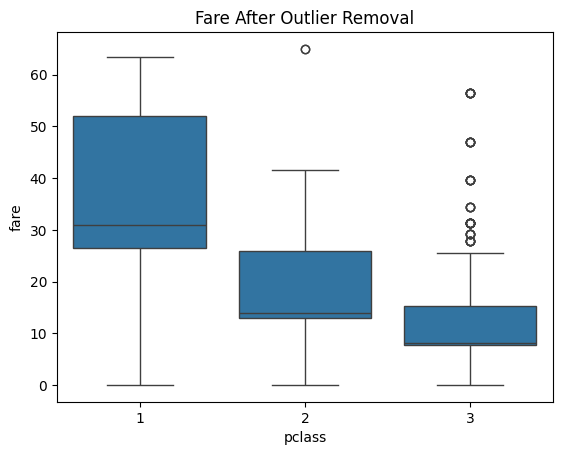

In [19]:
# Detect outliers using IQR for fare
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
titanic = titanic[~((titanic['fare'] < (Q1 - 1.5 * IQR)) | (titanic['fare'] >(Q3 + 1.5 * IQR)))]

# plot after removing outliers
sns.boxplot(x='pclass', y='fare', data=titanic)
plt.title("Fare After Outlier Removal")
plt.show()